<a href="https://colab.research.google.com/github/Rohit1208/Deep_Learning/blob/main/STROKE_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
file='/content/drive/MyDrive/hemanth/archive.zip'

In [ ]:
data1 = '/content/drive/MyDrive/Data.zip'

In [ ]:
data = r'C:\Users\ST-0008\Documents\NEW PROJECT\stroke_project\Data'

In [ ]:
import zipfile as zf
data_zip=zf.ZipFile(data1)
data_zip.extractall()
!ls

Data  drive  sample_data


In [ ]:
data = 'Data'

In [ ]:
Images = []
import os
for dirname, _, filenames in os.walk(data):
    for filename in filenames:
        img = os.path.join(dirname, filename)
        Images.append(img)

In [ ]:
len(Images)

6796

In [ ]:
Images[0]

'Data/NORMAL/N23[N23]/N23_0_94.jpg'

In [ ]:
Class_label = []
for i in Images:
  j = i.split("/")
  
#   print(j)
  Class_label.append(j[-3])
    
    

In [ ]:
Class_label[0]

'NORMAL'

In [ ]:
import random

In [ ]:
temp = list(zip(Images, Class_label)) 
random.shuffle(temp) 
Images, Class_label = zip(*temp)  

In [ ]:
data = pd.DataFrame(list(zip(Images, Class_label)), columns =['Image_path', 'Class_label'])   

In [ ]:
data

,Image_path,Class_label
0,Data/Hemorrhagic/11[11]/11_0_188.jpg,Hemorrhagic
1,Data/Hemorrhagic/6[6]/6_0_35.jpg,Hemorrhagic
2,Data/NORMAL/N2[N2]/N2_0_34.jpg,NORMAL
3,Data/NORMAL/N4[N4]/N4_0_25.jpg,NORMAL
4,Data/Hemorrhagic/15[15]/IMG-0002-00027.jpg,Hemorrhagic
...,...,...
6791,Data/Hemorrhagic/12[12]/12_0_136.jpg,Hemorrhagic
6792,Data/NORMAL/N23[N23]/N23_0_74.jpg,NORMAL
6793,Data/NORMAL/N24[N24]/N24_0_144.jpg,NORMAL
6794,Data/NORMAL/N12[N12]/N12_0_72.jpg,NORMAL


In [ ]:
data.shape 

(6796, 2)

In [ ]:
data.Class_label.value_counts() 

NORMAL         4106
Hemorrhagic    2690
Name: Class_label, dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

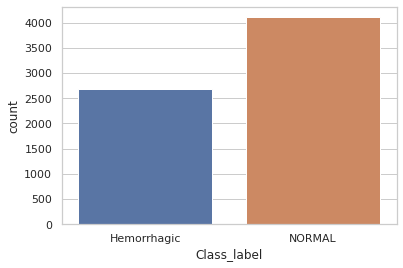

In [ ]:
sns.countplot(x = data.Class_label, data = data) 
plt.show()

Text(0.5, 0, 'Class_label')

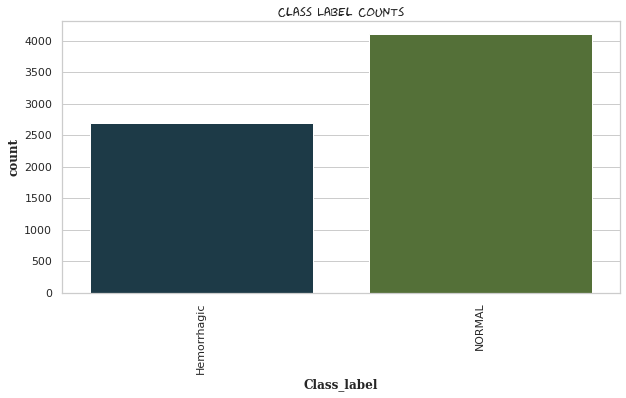

In [ ]:
#counts of top 10 drugs
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="Class_label", data=data, palette=sns.color_palette("cubehelix", 4))
plt.xticks(rotation=90)
plt.title("Class Label Counts", {"fontname":"fantasy", "fontweight":"bold", "fontsize":"medium"})
plt.ylabel("count", {"fontname": "serif", "fontweight":"bold"})
plt.xlabel("Class_label", {"fontname": "serif", "fontweight":"bold"}) 

In [ ]:
from sklearn.utils import resample
# Separate majority and minority classes
df_c0 = data[data['Class_label']== 'NORMAL']
df_c1 = data[data['Class_label']== 'Hemorrhagic']

 
# Downsample majority class
df_c0_upsampled = resample(df_c0, replace=False,  n_samples = 2501,random_state=123)
df_c1_upsampled = resample(df_c1, replace=False,  n_samples = 2500,random_state=123)




# Combine minority class with downsampled majority class
df_upsampled = pd.concat([df_c0_upsampled,df_c1_upsampled])
 
# Display new class counts
df_upsampled['Class_label'].value_counts()

NORMAL         2501
Hemorrhagic    2500
Name: Class_label, dtype: int64

Text(0.5, 0, 'Class_label')

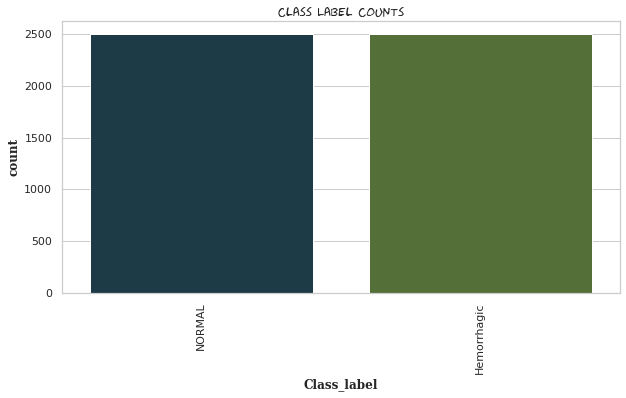

In [ ]:
#counts of top 10 drugs
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="Class_label", data=df_upsampled, palette=sns.color_palette("cubehelix", 4))
plt.xticks(rotation=90)
plt.title("Class Label Counts", {"fontname":"fantasy", "fontweight":"bold", "fontsize":"medium"})
plt.ylabel("count", {"fontname": "serif", "fontweight":"bold"})
plt.xlabel("Class_label", {"fontname": "serif", "fontweight":"bold"})

In [ ]:
df = df_upsampled.sample(frac=1)

In [ ]:
df.head()

,Image_path,Class_label
1617,Data/NORMAL/N3[N3]/N3_0_311.jpg,NORMAL
3915,Data/NORMAL/N3[N3]/N3_0_23.jpg,NORMAL
6014,Data/Hemorrhagic/6[6]/6_0_47.jpg,Hemorrhagic
1625,Data/Hemorrhagic/4[4]/4_0_146.jpg,Hemorrhagic
6101,Data/NORMAL/N10[N10]/N10_0_31.jpg,NORMAL


In [ ]:
df['Image_path'].value_counts()

Data/Hemorrhagic/8[8]/8_0_153.jpg         1
Data/NORMAL/N11[N11]/N11_0_72.jpg         1
Data/NORMAL/N6[N6]/N6_0_45.jpg            1
Data/NORMAL/N9[N9]/N9_0_125.jpg           1
Data/NORMAL/N1[N1]/N1_0_67.jpg            1
                                         ..
Data/Hemorrhagic/14[14]/14_0_99.jpg       1
Data/Hemorrhagic/6[6]/6_0_49.jpg          1
Data/Hemorrhagic/5[5]/5_0_74.jpg          1
Data/Hemorrhagic/21[21] _2/19_0_36.jpg    1
Data/NORMAL/N4[N4]/N4_0_31.jpg            1
Name: Image_path, Length: 5001, dtype: int64

In [ ]:
df.iloc[0,:-1]

Image_path    Data/NORMAL/N3[N3]/N3_0_311.jpg
Name: 1617, dtype: object

In [ ]:
import os
from PIL import Image


In [ ]:
df = df[df.Image_path != 'Data/NORMAL/N4[N4]/Thumbs.db']

In [ ]:
def resize_images(img):
  file = Image.open(img)
  img = file.convert('RGB')
  img_bgr= img.resize((128, 128))
  img_bgr = np.array(img_bgr)
  return img_bgr

In [ ]:
#save resized images into images.
images = [resize_images(img) for img in df['Image_path']]

In [ ]:
images

[array([[[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ...,
         [1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],
 
        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ...,
         [1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],
 
        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ...,
         [1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],
 
        ...,
 
        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ...,
         [1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],
 
        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ...,
         [1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],
 
        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ...,
         [1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]]], dtype=uint8), array([[[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ...,
         [1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],
 
        [[1, 1

In [ ]:
# print number of classes in our dataset 
num_classes = len(np.unique(data['Class_label']))

In [ ]:
num_classes

2

In [ ]:
# save the class into class_names
class_names = list(data['Class_label'])

In [ ]:
# Print the shape of the image
images[0].shape

(128, 128, 3)

Text(0.5, 1.0, 'NORMAL')

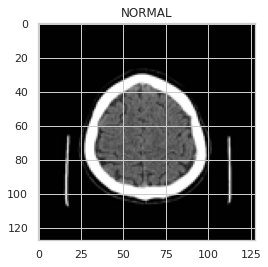

In [ ]:
#See the image with class label
plt.imshow(images[5])
plt.title(class_names[5])

Text(0.5, 1.0, 'NORMAL')

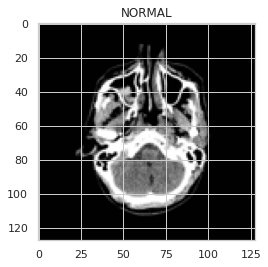

In [ ]:
#See the image with class label
plt.imshow(images[9])
plt.title(class_names[9])

Text(0.5, 1.0, 'NORMAL')

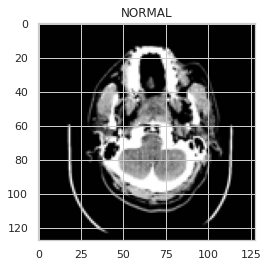

In [ ]:
#See the image with class label
plt.imshow(images[70])
plt.title(class_names[70])

In [ ]:
# Convert the images into array
images =  np.array(images)

In [ ]:
# Shape of the images
images.shape

(5000, 128, 128, 3)

In [ ]:
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
Y = enc.fit_transform(df['Class_label'])
from keras.utils.np_utils  import to_categorical
y = to_categorical(Y)

# IF Y = 1
# K = [0,1]
# Y.APPEND(K)
# ELE
# K = [1,]

In [ ]:
y

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
enc.classes_

array(['Hemorrhagic', 'NORMAL'], dtype='<U11')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, y, test_size=0.3,stratify = y,random_state=42)

In [ ]:
X_train.shape

(3500, 128, 128, 3)

In [ ]:
X_test.shape

(1500, 128, 128, 3)

In [ ]:
import os
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalMaxPooling2D
# from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
# from keras.optimizers import Adam

# CNN

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Set the CNN model 

batch_size = None

model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', batch_input_shape = (5000, 128, 128, 3)))


model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1))


model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters =32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))
model.add(Flatten())



# model.add(GlobalMaxPooling2D())
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation = "softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (5000, 128, 128, 64)      4864      
_________________________________________________________________
conv2d_7 (Conv2D)            (5000, 128, 128, 32)      51232     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (5000, 64, 64, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (5000, 64, 64, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (5000, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (5000, 32, 32, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (5000, 32, 32, 32)       

In [ ]:
# Compile the model
# opt = Adam(lr=0.001)

# optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = 'rmsprop', loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
# Fit the model
history = model.fit(X_train, y_train, epochs = 5, validation_data = (X_test,y_test),batch_size =500)

Epoch 1/5
7/7 [==============================] - 13s 2s/step - loss: 0.4498 - accuracy: 0.7789 - val_loss: 0.2992 - val_accuracy: 0.8713
Epoch 2/5
7/7 [==============================] - 12s 2s/step - loss: 0.4217 - accuracy: 0.8011 - val_loss: 0.2550 - val_accuracy: 0.9120
Epoch 3/5
7/7 [==============================] - 13s 2s/step - loss: 0.4064 - accuracy: 0.8140 - val_loss: 0.2957 - val_accuracy: 0.8760
Epoch 4/5
7/7 [==============================] - 13s 2s/step - loss: 0.2897 - accuracy: 0.8763 - val_loss: 0.2253 - val_accuracy: 0.8940
Epoch 5/5
7/7 [==============================] - 12s 2s/step - loss: 0.3017 - accuracy: 0.8620 - val_loss: 0.1653 - val_accuracy: 0.9353


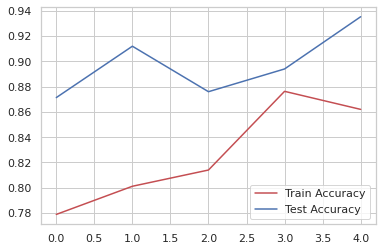

In [ ]:
# plot the accuracy plot
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'b')
plt.legend({'Train Accuracy': 'r', 'Test Accuracy':'b'})
plt.show()

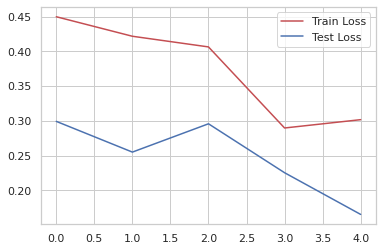

In [ ]:
# plot the accuracy plot
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.legend({'Train Loss': 'r', 'Test Loss':'b'})
plt.show()

In [ ]:
class_names = enc.classes_
class_names

array(['Hemorrhagic', 'NORMAL'], dtype='<U11')

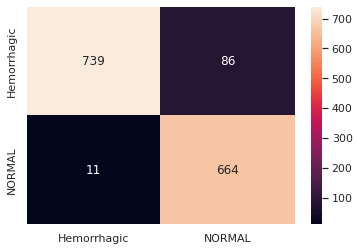

In [ ]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
class_names = enc.classes_
df_heatmap = pd.DataFrame(confusion_matrix(np.argmax((model.predict(X_test)),axis = 1),np.argmax(y_test,axis=1)),columns = class_names, index = class_names)
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
matrix = classification_report(np.argmax((model.predict(X_test)),axis = 1),np.argmax(y_test,axis=1))
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           0       0.99      0.90      0.94       825
           1       0.89      0.98      0.93       675

    accuracy                           0.94      1500
   macro avg       0.94      0.94      0.94      1500
weighted avg       0.94      0.94      0.94      1500



In [ ]:
# #print the test accuracy
# score = accuracy_score(X_test, y_test, verbose=0)
# print('Test accuracy:', score[1])
# print the test accuracy
# score_1 = model.eval(X_test, y_test, verbose=0)
# model.evaluate(X_test,y_test)

# print('Test accuracy:', score_1[1])

In [ ]:
# # Creating results data frame 
# 
# new = ['CNN ',score[1]]
# results.loc[0] = new

Predicted class: NORMAL
Actual class: NORMAL


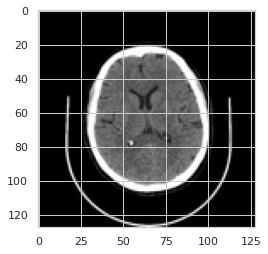

In [ ]:
#Cheking the model
i = 10
pred = np.argmax(model.predict(np.array([X_test[i]]))[0])
act = np.argmax(y_test[i])
print("Predicted class: {}".format(enc.classes_[pred]))
print("Actual class: {}".format(enc.classes_[act]))

plt.imshow(X_test[i])

Predicted class: NORMAL
Actual class: NORMAL


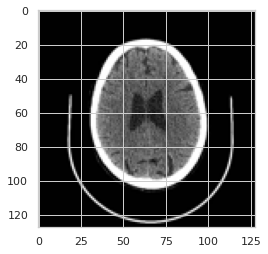

In [ ]:
i = 27
pred = np.argmax(model.predict(np.array([X_test[i]]))[0])
act = np.argmax(y_test[i])
print("Predicted class: {}".format(enc.classes_[pred]))
print("Actual class: {}".format(enc.classes_[act]))

plt.imshow(X_test[i])

In [ ]:
# print the test accuracy
score_2 = model_1.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', score_2[1])

# VGG 19

In [ ]:
# import the vgg16 model
from keras.applications.vgg19 import VGG19

In [ ]:
vgg=VGG19(weights='imagenet',include_top=False,input_shape=(128,128,3))

80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
vgg.trainable=False

In [ ]:
# Set the vgg16 model
model_1=Sequential()
model_1.add(vgg)
model_1.add(Flatten())
model_1.add(Dense(128, activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(Dense(2, activation='softmax'))

In [ ]:
#Compile the model
model_1.compile(optimizer = 'rmsprop', loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
#Fit the data or train the model
History_1 = model_1.fit(X_train, y_train, epochs = 10, validation_data = (X_test,y_test),batch_size = 128)

Epoch 1/10
28/28 [==============================] - 43s 1s/step - loss: 5.4075 - accuracy: 0.7209 - val_loss: 0.3963 - val_accuracy: 0.8300
Epoch 2/10
28/28 [==============================] - 14s 503ms/step - loss: 0.4359 - accuracy: 0.8317 - val_loss: 0.2809 - val_accuracy: 0.8987
Epoch 3/10
28/28 [==============================] - 14s 505ms/step - loss: 0.4032 - accuracy: 0.8549 - val_loss: 1.0954 - val_accuracy: 0.7280
Epoch 4/10
28/28 [==============================] - 14s 503ms/step - loss: 0.3392 - accuracy: 0.8940 - val_loss: 0.1490 - val_accuracy: 0.9420
Epoch 5/10
28/28 [==============================] - 14s 503ms/step - loss: 0.1954 - accuracy: 0.9326 - val_loss: 0.1460 - val_accuracy: 0.9580
Epoch 6/10
28/28 [==============================] - 14s 504ms/step - loss: 0.1739 - accuracy: 0.9440 - val_loss: 0.2841 - val_accuracy: 0.9073
Epoch 7/10
28/28 [==============================] - 14s 503ms/step - loss: 0.0534 - accuracy: 0.9843 - val_loss: 0.0497 - val_accuracy: 0.9820
Ep

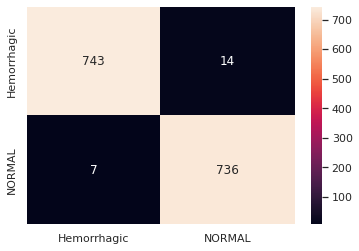

In [ ]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
class_names = enc.classes_
df_heatmap = pd.DataFrame(confusion_matrix(np.argmax((model_1.predict(X_test)),axis = 1),np.argmax(y_test,axis=1)),columns = class_names, index = class_names)
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [ ]:
# matrix = classification_report(pred,ytrue)
# print('Classification report : \n',matrix)


In [ ]:
# print the test accuracy
score_2 = model_1.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', score_2[1])

Test accuracy: 0.9860000014305115


In [ ]:
new = ['VGG-16 ',score_2[1]]
results.loc[1] = new

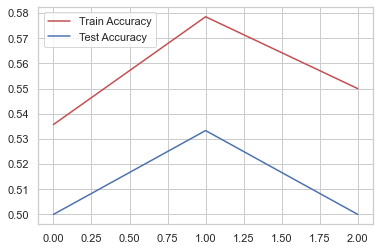

In [ ]:
# plot the accuracy plot
plt.plot(History_1.history['accuracy'], 'r')
plt.plot(History_1.history['val_accuracy'], 'b')
plt.legend({'Train Accuracy': 'r', 'Test Accuracy':'b'})
plt.show()

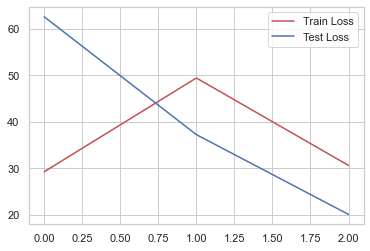

In [ ]:
# plot the accuracy plot
plt.plot(History_1.history['loss'], 'r')
plt.plot(History_1.history['val_loss'], 'b')
plt.legend({'Train Loss': 'r', 'Test Loss':'b'})
plt.show()

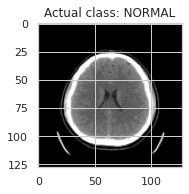

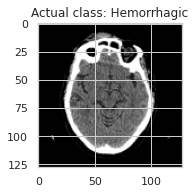

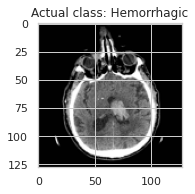

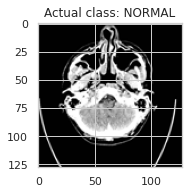

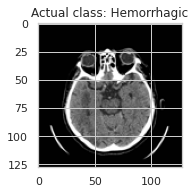

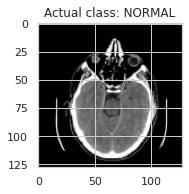

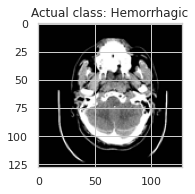

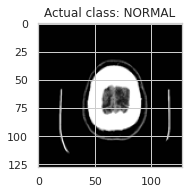

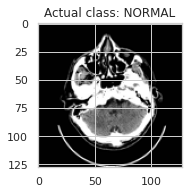

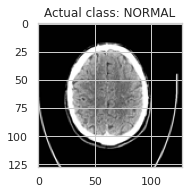

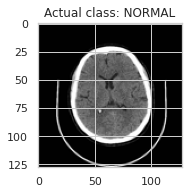

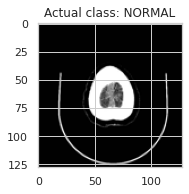

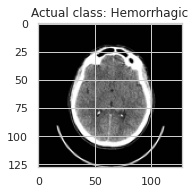

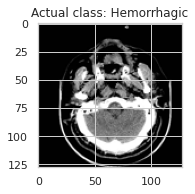

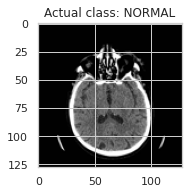

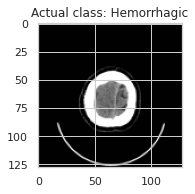

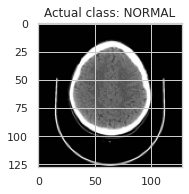

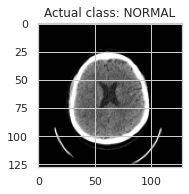

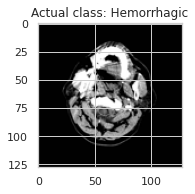

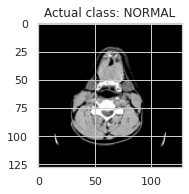

In [ ]:
# print images with actiual abnd predicted class labels
for i in range(20):
  plt.figure(figsize=(15,15))
  plt.subplot(4,5,i+1)
  pred = model_1.predict(np.array([X_test[i]]))[0]
  act = np.argmax(y_test[i])
  # plt.title("Predicted class: {}\n Actual class: {}".format(enc.classes_[pred],enc.classes_[act]))
  plt.title("Actual class: {}".format(enc.classes_[act]))
  plt.imshow(X_test[i])

In [ ]:
results = pd.DataFrame(columns=['model', 'Test-Accuracy'])
new = ['CNN',94]
results.loc[1] = new
new = ['ANN',96]
results.loc[2] = new

In [ ]:
results

,model,Test-Accuracy
1,CNN,94
2,ANN,96
